# Data Import and Initial Inspection

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv("netflix1.csv")
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [9]:
df.shape

(8790, 10)

In [10]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [11]:
null_values = df.isnull().sum()
null_values

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [12]:
if df.duplicated().values.any():
    print("There are duplicate values")
else:
    print("There are no duplicate values")

There are no duplicate values


# Data Cleaning and Column Renaming

In [13]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [14]:
df.drop(columns="show_id", inplace=True)
df.head()

,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [15]:
df.rename(columns={
    'type': 'Type',
    'title': 'Title',
    'director': 'Director',
    'country': 'Country',
    'date_added': 'Date',
    'release_year': 'ReleaseYear',
    'rating': 'Rating',
    'duration': 'Duration',
    'listed_in': 'ListedIn'
}, inplace=True)
df.head()

,Type,Title,Director,Country,Date,ReleaseYear,Rating,Duration,ListedIn
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


# Data Visualization

In [16]:
type_counts = df['Type'].value_counts()
type_counts

Type
Movie      6126
TV Show    2664
Name: count, dtype: int64

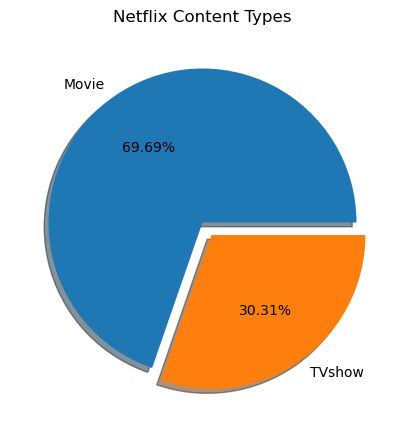

In [17]:
plt.figure(figsize=(5,5))
mylabels = ['Movie','TVshow']
myexplode = [0, 0.1]
plt.pie(type_counts,labels = mylabels, explode = myexplode, shadow = True, autopct="%1.2f%%")
plt.title("Netflix Content Types")
plt.show()

In [18]:
category_counts = df["Title"].value_counts()
category_counts.head(10)

Title
9-Feb                          2
15-Aug                         2
22-Jul                         2
Dick Johnson Is Dead           1
SGT. Will Gardner              1
Sex and the City 2             1
Sex and the City: The Movie    1
Sex Doll                       1
Sexo, Pudor y Lagrimas         1
Shahanpan Dega Deva            1
Name: count, dtype: int64

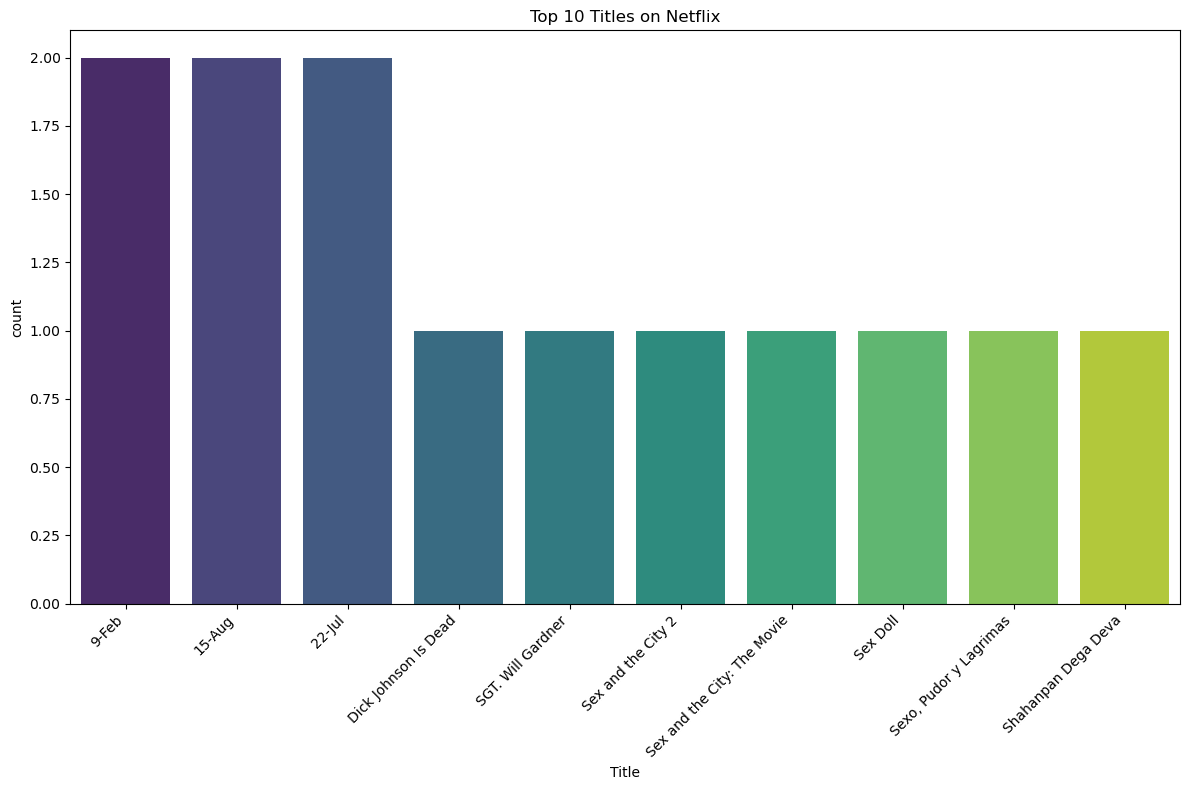

In [19]:
category_counts = df["Title"].value_counts()
top_categories = category_counts.head(10)
top_titles_df = df[df["Title"].isin(top_categories.index)]

plt.figure(figsize=(12, 8))
sns.countplot(x='Title', data=top_titles_df, order=top_categories.index, palette='viridis')
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Titles on Netflix")
plt.tight_layout()
plt.show()

In [20]:
director_counts = df['Director'].value_counts()
director_counts

Director
Not Given                         2588
Rajiv Chilaka                       20
Alastair Fothergill                 18
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
                                  ... 
Matt D'Avella                        1
Parthiban                            1
Scott McAboy                         1
Raymie Muzquiz, Stu Livingston       1
Mozez Singh                          1
Name: count, Length: 4528, dtype: int64

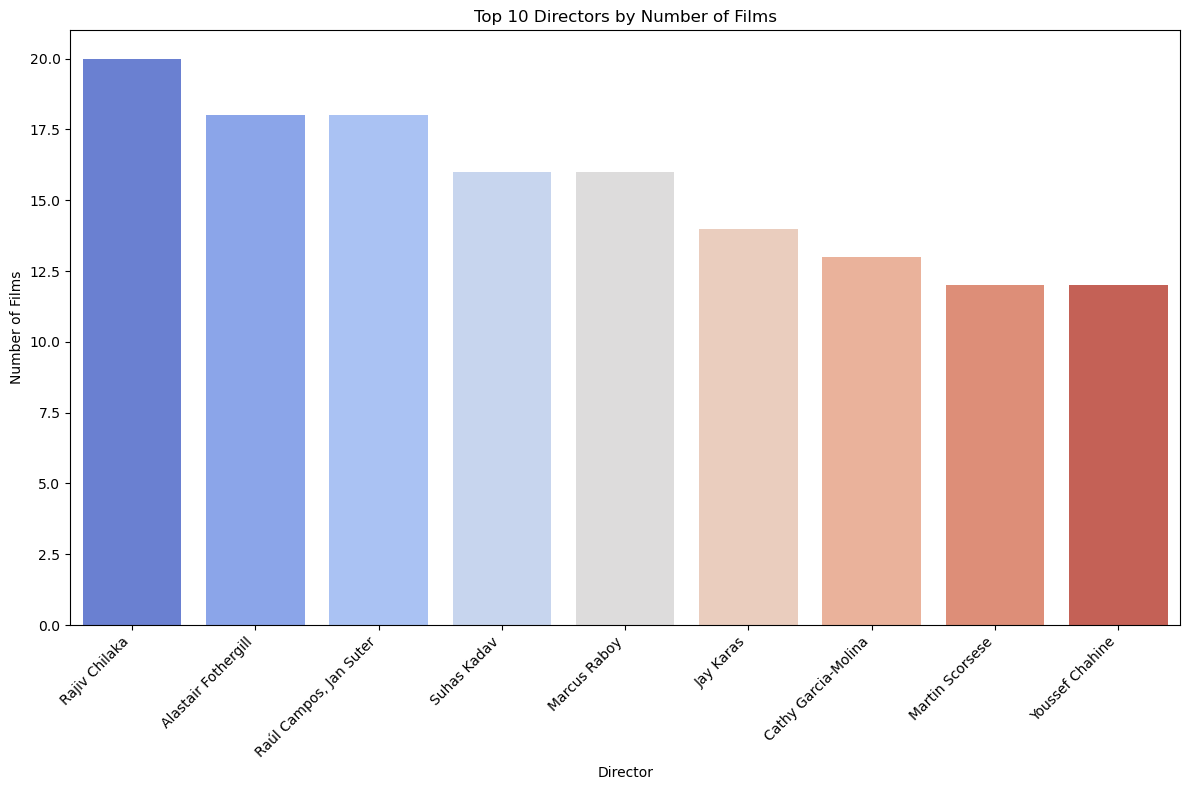

In [21]:
director_counts = df['Director'].value_counts()[1:10]
top_directors = director_counts.head(10)
top_directors_df = df[df['Director'].isin(top_directors.index)]

plt.figure(figsize=(12, 8))
sns.barplot(x=top_directors.index, y=top_directors.values, palette='coolwarm')
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Directors by Number of Films")
plt.xlabel("Director")
plt.ylabel("Number of Films")
plt.tight_layout()
plt.show()

In [22]:
country_counts = df['Country'].value_counts()
country_df = pd.DataFrame({
    'Country': country_counts.index,
    'Count': country_counts.values
})

top_countries_df = country_df.nlargest(50, 'Count')
top_countries_df

,Country,Count
0,United States,3240
1,India,1057
2,United Kingdom,638
3,Pakistan,421
4,Not Given,287
5,Canada,271
6,Japan,259
7,South Korea,214
8,France,213
9,Spain,182


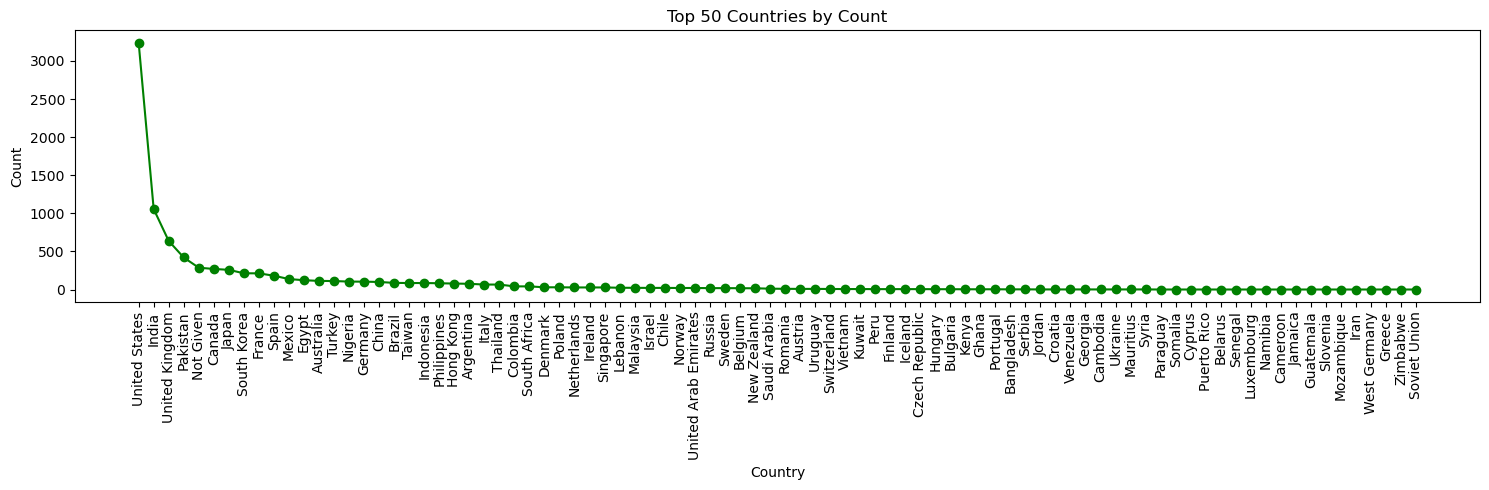

In [23]:
plt.figure(figsize=(15, 5))
plt.plot(country_df['Country'], country_df['Count'],marker = 'o', color='g')
plt.xticks(rotation=90)
plt.title('Top 50 Countries by Count')
plt.xlabel('Country')
plt.ylabel('Count')
#plt.grid(True)
plt.tight_layout()  
plt.show()

In [24]:
ratings = df.groupby(['Rating', 'Type']).size().reset_index(name='count')
ratings

,Rating,Type,count
0,G,Movie,41
1,NC-17,Movie,3
2,NR,Movie,75
3,NR,TV Show,4
4,PG,Movie,287
5,PG-13,Movie,490
6,R,Movie,797
7,R,TV Show,2
8,TV-14,Movie,1427
9,TV-14,TV Show,730


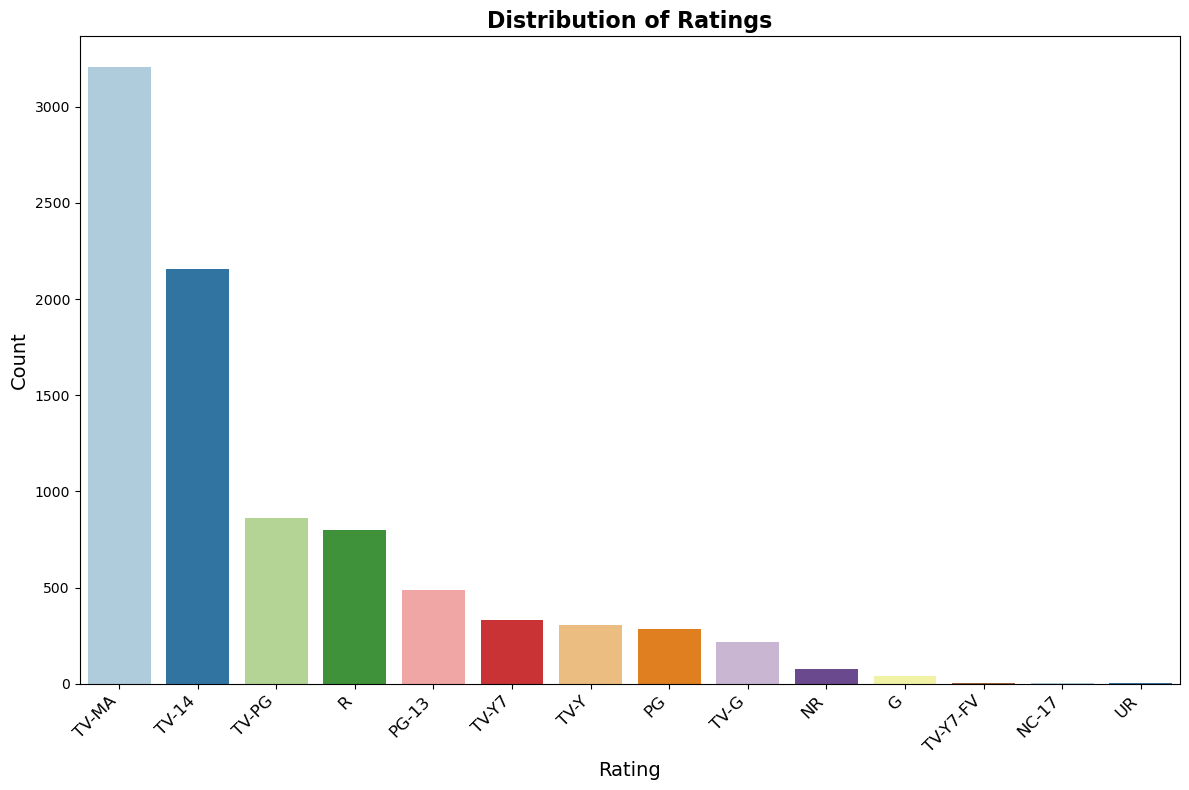

In [25]:
plt.figure(figsize=(12, 8))

sns.countplot(
    x= 'Rating', 
    data=df, 
    order=df['Rating'].value_counts().index,
    palette='Paired'
)

plt.title('Distribution of Ratings', fontsize=16, fontweight='bold')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12, color='black')

plt.tight_layout()
plt.show()

In [26]:
years_count = df["ReleaseYear"].value_counts()
years_count

ReleaseYear
2018    1146
2017    1030
2019    1030
2020     953
2016     901
        ... 
1966       1
1959       1
1925       1
1947       1
1961       1
Name: count, Length: 74, dtype: int64

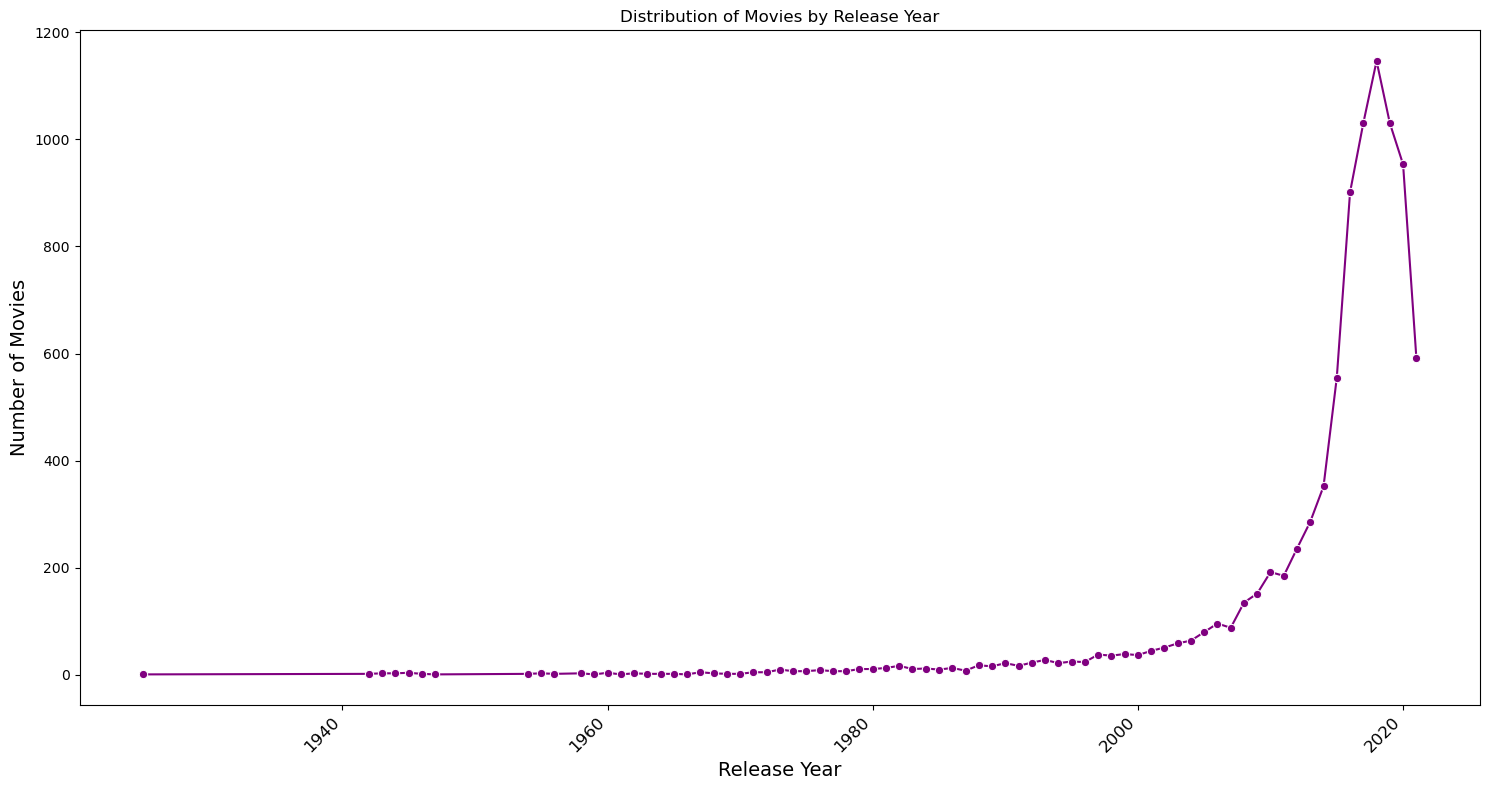

In [27]:
years_df = years_count.reset_index()
years_df.columns = ['ReleaseYear', 'Count']

plt.figure(figsize=(15, 8))
sns.lineplot(
    x='ReleaseYear',
    y='Count',
    data=years_df,
    marker='o',  
    color='purple'   
)

plt.title('Distribution of Movies by Release Year')
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12, color='black')

plt.tight_layout()
plt.show()

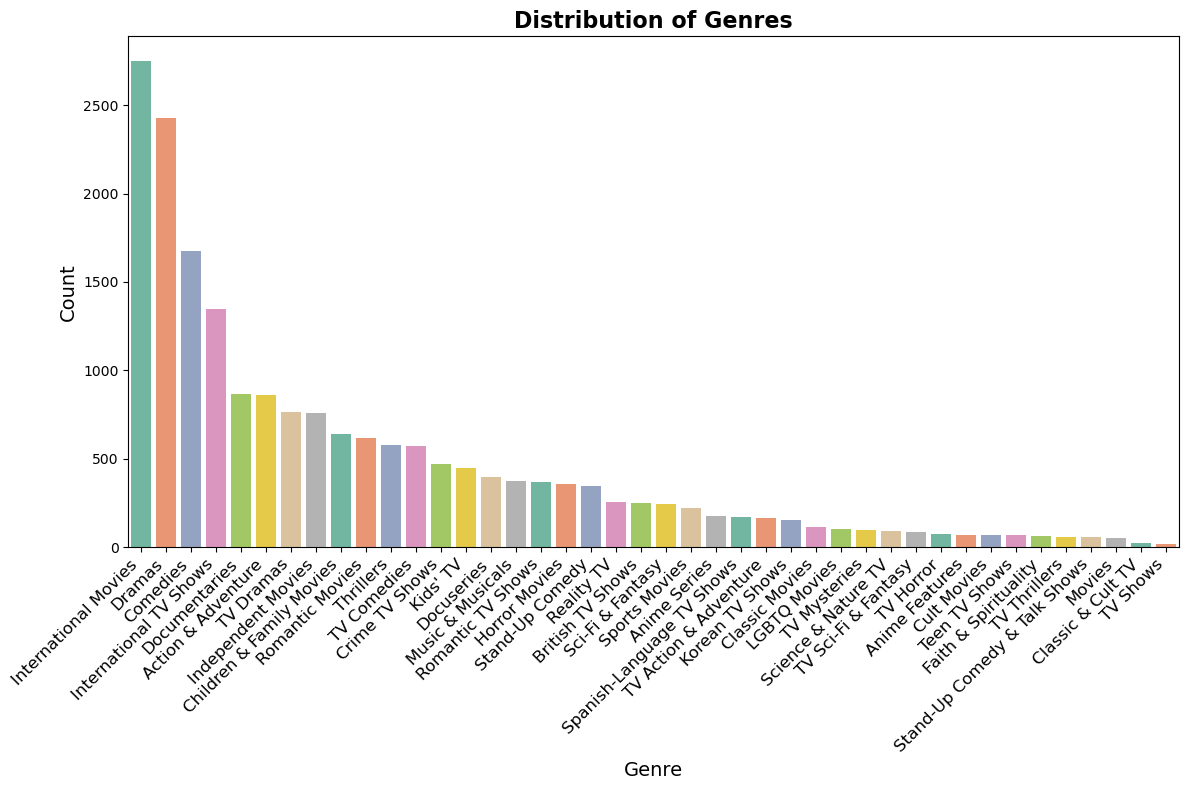

In [28]:
df['ListedIn'] = df['ListedIn'].astype(str)
df['ListedIn'] = df['ListedIn'].str.split(', ')
df_exploded = df.explode('ListedIn')
genre_counts = df_exploded['ListedIn'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

plt.figure(figsize=(12, 8))

sns.barplot(
    x='Genre',
    y='Count',
    data=genre_counts,
    palette='Set2'   
)

plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12, color='black')

plt.tight_layout()
plt.show()

# THANK YOU!

***By: MD Zakir Hossen***